In [175]:
import os
import sys
import cv2
import math
import yaml
import random
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt


# Add the root folder to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [13]:
from core.transformations import Transformations

In [3]:
%load_ext autoreload
%autoreload 2

In [190]:


def apply_transformations_and_display(image_path, transformer, pipeline):
    """
    Applies a series of transformations to a stego image and displays the original image along with
    all transformed variations in a Jupyter Notebook using matplotlib.

    Parameters:
    -----------
    image_path : str
        Path to the stego image.
    transformer : object
        An object that implements the 'apply_pipeline' method to apply transformations.
    pipeline : list of dict
        A list of dictionaries defining each transformation operation. Each dictionary should include:
            - 'name': The transformation name.
            - 'variations': A list of parameter sets.
            - 'titles': A list of corresponding titles for each variation.

    Returns:
    --------
    dict
        A dictionary mapping each transformation title to its resulting transformed image(s).
    """
    # Read the original image using OpenCV
    image = cv2.imread(image_path)

    # Apply the pipeline transformations
    results = transformer.apply_pipeline(image, pipeline)

    # Prepare the list of images to display
    display_images = [("Original", image)]
    
    for step in pipeline:
        name = step['name']
        variations = results.get(name, [])
        titles = step.get('titles', [])

        for img, title in zip(variations, titles):
            display_images.append((title, img))
    
    # Determine grid layout dynamically: Arrange in a grid of up to 3 columns
    total_images = len(display_images)
    cols = min(4, total_images)
    rows = math.ceil(total_images / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows))
    axes = np.array(axes).flatten()

    # Display images with titles
    for ax, (title, img) in zip(axes, display_images):
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)
        ax.set_title(title)
        ax.axis("off")

    # Hide any unused subplots
    for ax in axes[len(display_images):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

    return results

In [177]:
def load_yaml_config(config_path, key):
    if not os.path.exists(config_path):  # Check if the file exists
        raise FileNotFoundError(f"Configuration file not found: {config_path}")

    with open(config_path, "r") as file:
        config = yaml.safe_load(file)
    
    return config[key]


In [186]:
# Define the desired transformations
transformations_to_apply = load_yaml_config(config_path="/app/configs/transformations.yaml", 
                                            key='transformations')
transformations_to_apply

[{'name': 'resize',
  'variations': [{'scale': 0.999},
   {'scale': 0.975},
   {'scale': 0.95},
   {'scale': 0.9},
   {'scale': 0.85},
   {'scale': 0.75},
   {'scale': 0.65},
   {'scale': 0.5}],
  'titles': ['scale 99.9%',
   'scale 97.5%',
   'scale 95%',
   'scale 90%',
   'scale 85%',
   'scale 75%',
   'scale 65%',
   'scale 50%']},
 {'name': 'gaussian_noise',
  'variations': [{'mean': 0, 'sigma': 2},
   {'mean': 0, 'sigma': 8},
   {'mean': 0, 'sigma': 25},
   {'mean': 0, 'sigma': 32},
   {'mean': 5, 'sigma': 2},
   {'mean': 5, 'sigma': 8},
   {'mean': 5, 'sigma': 25},
   {'mean': 5, 'sigma': 32}],
  'titles': ['Gaussian Noise: 0, 2',
   'Gaussian Noise: 0, 8',
   'Gaussian Noise: 0, 25',
   'Gaussian Noise: 0, 32',
   'Gaussian Noise: 5, 2',
   'Gaussian Noise: 5, 8',
   'Gaussian Noise: 5, 25',
   'Gaussian Noise: 5, 32']},
 {'name': 'salt_pepper_noise',
  'variations': [{'salt_prob': 0.01, 'pepper_prob': 0.01},
   {'salt_prob': 0.01, 'pepper_prob': 0.3},
   {'salt_prob': 0.03, '

In [179]:
DATA_DIR = r'../data/processed/CFD'
data_path = Path(DATA_DIR)

In [180]:
person_folders = [os.path.join(data_path, f) for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))]
person_folder = Path(random.choice(person_folders))
person_folder

PosixPath('../data/processed/CFD/AM-252')

In [192]:
test_path = Path('/app/output/reveal')

In [193]:
# instantiate the class 
transformer = Transformations()

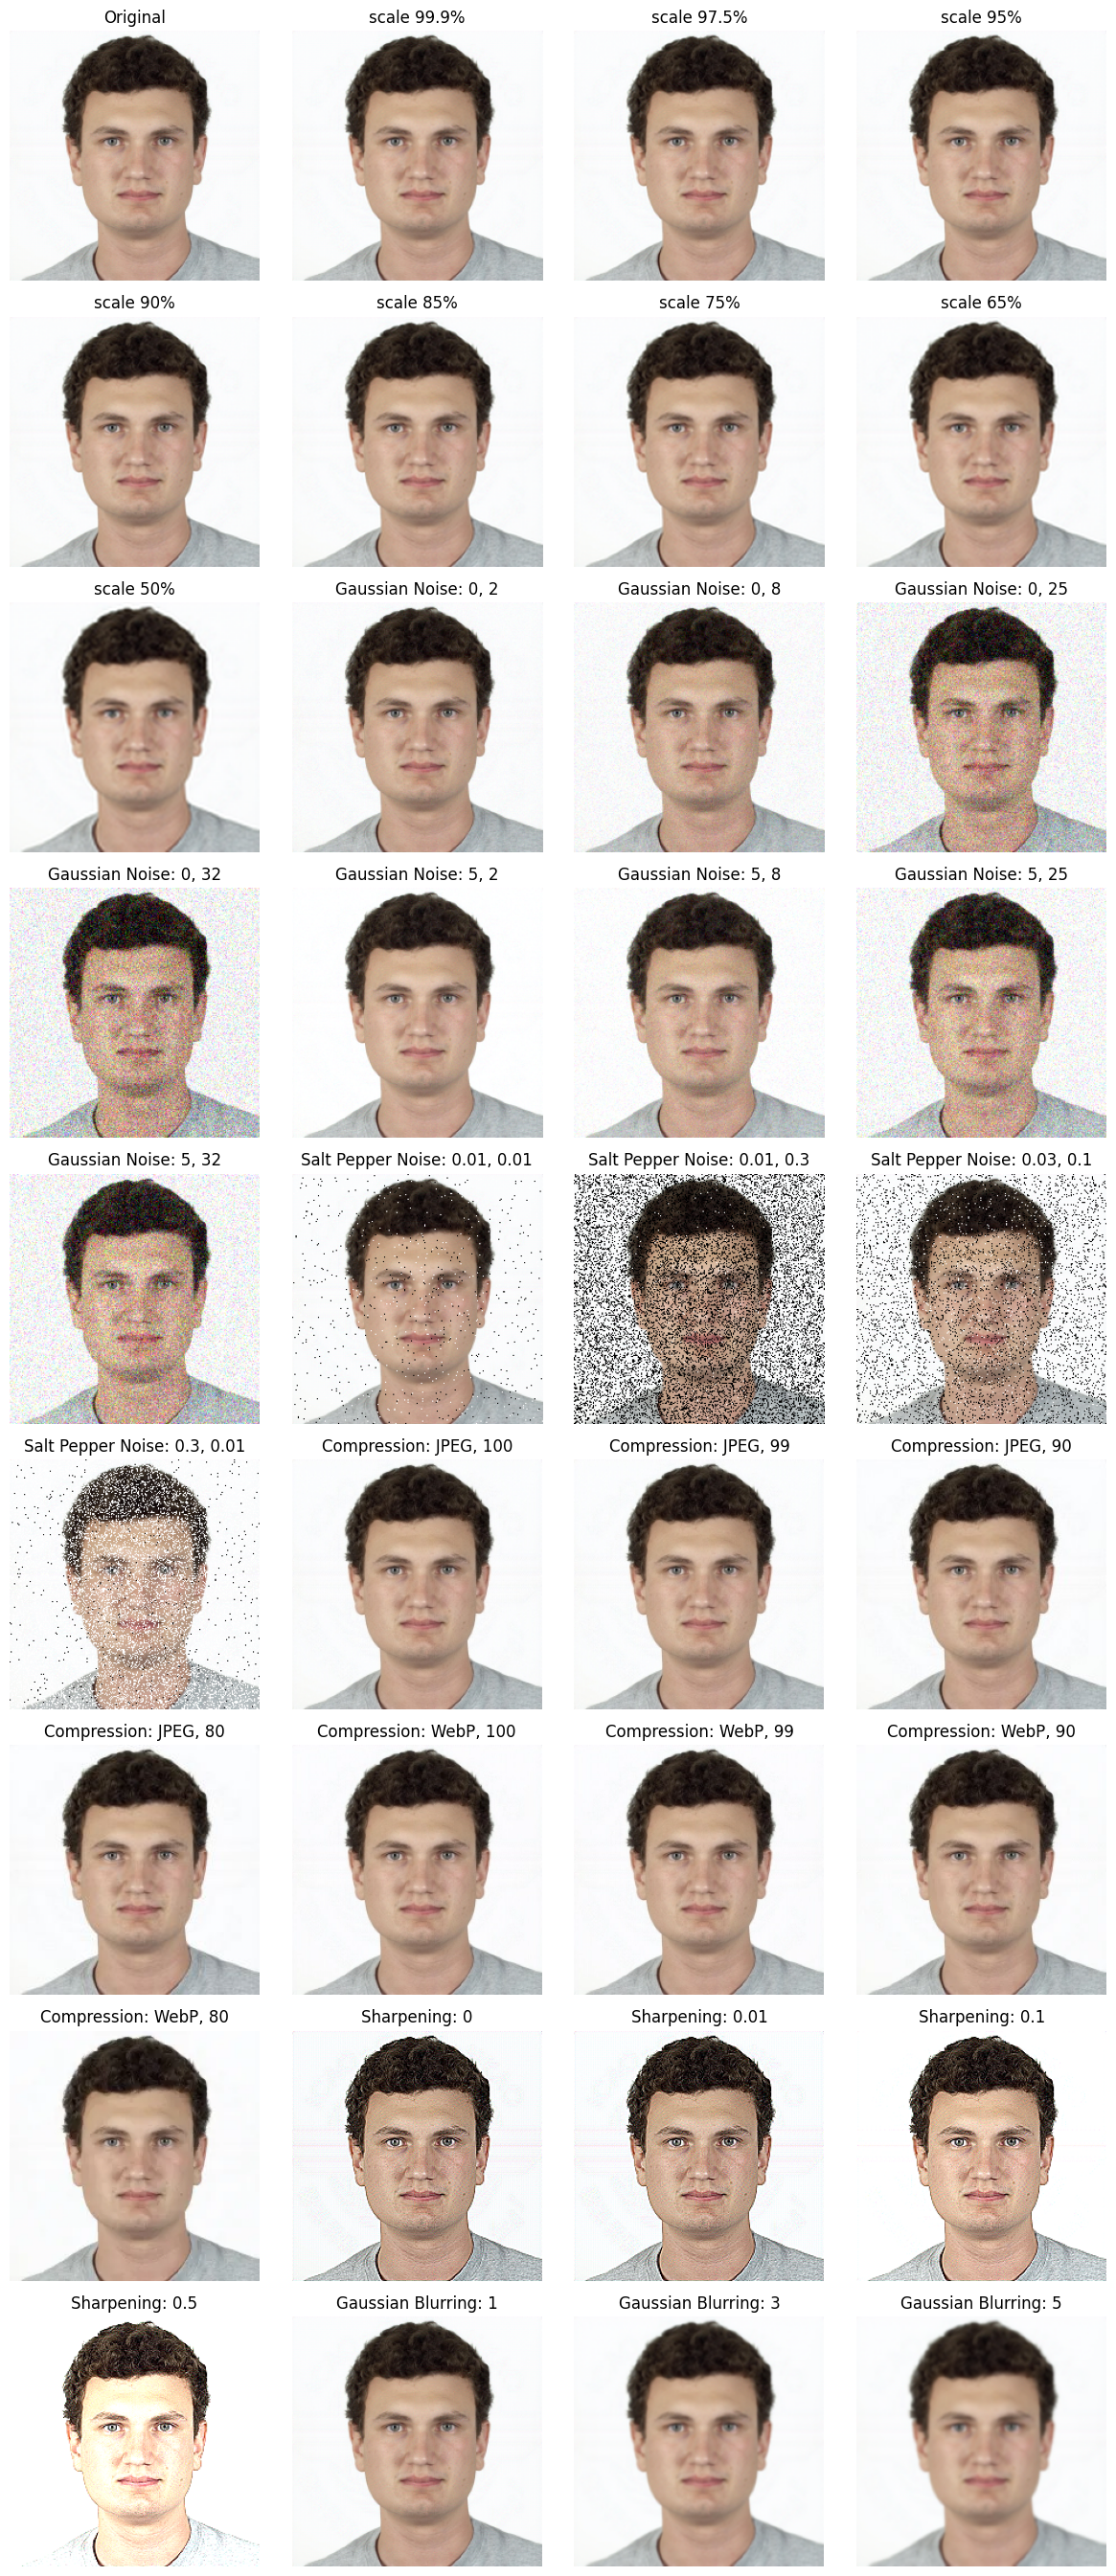

In [195]:
for image_path in test_path.iterdir():
    if 'stego_1' in str(image_path):
        pass
        
# Apply to only one person to check
results = apply_transformations_and_display(image_path, 
                                       transformer, 
                                       transformations_to_apply)

In [201]:
output_folder = '/app/output/reveal/output_transformations/'
for dict_key, list_images in results.items():
    print(dict_key)
    for i, img in enumerate(list_images):
        output_path = output_folder + dict_key+'_' + str(i) + '.png'
        print(output_path)
        cv2.imwrite(output_path, img)

resize
/app/output/reveal/output_transformations/resize_0.png
/app/output/reveal/output_transformations/resize_1.png
/app/output/reveal/output_transformations/resize_2.png
/app/output/reveal/output_transformations/resize_3.png
/app/output/reveal/output_transformations/resize_4.png
/app/output/reveal/output_transformations/resize_5.png
/app/output/reveal/output_transformations/resize_6.png
/app/output/reveal/output_transformations/resize_7.png
gaussian_noise
/app/output/reveal/output_transformations/gaussian_noise_0.png
/app/output/reveal/output_transformations/gaussian_noise_1.png
/app/output/reveal/output_transformations/gaussian_noise_2.png
/app/output/reveal/output_transformations/gaussian_noise_3.png
/app/output/reveal/output_transformations/gaussian_noise_4.png
/app/output/reveal/output_transformations/gaussian_noise_5.png
/app/output/reveal/output_transformations/gaussian_noise_6.png
/app/output/reveal/output_transformations/gaussian_noise_7.png
salt_pepper_noise
/app/output/reve